### Introduction Maths pour la Data Science


Ce notebook est un support de cours avec un TP intégré.

Je commencerai par charger une jeu de données. Nous l'utiliserons pour illustrer des concepts de stats/maths appliquées de base.

Nous utiliserons dans ce notebook la librairie, numpy, qui est celle de reference concernant le calcul scientifique (manipulation/operation vecteur matrice, outils statistiques ...) ainsi que pandas pour manipuler nos données.

Et nous verrons également deux librairies de visualisation matplotlib et seaborn



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

### Analyse de la taille 

Le terme régression a été introduit par Sir Francis Galton (cousin de C. Darwin) au xixe siècle, alors qu'il étudiait la taille des individus au sein d'une descendance. Il tentait de comprendre pourquoi les grands individus d'une population semblaient avoir des enfants d'une taille plus petite, plus proche de la taille moyenne de la population; d'où l'introduction du terme "régression" (approcher une variable à partir d’autres qui lui sont corrélées).

*Le terme provient de la régression vers la moyenne observée par Sir Francis Galton : les enfants de personnes de grande taille avaient eux-mêmes une taille supérieure à celle de la population en moyenne, mais inférieure à celle de leurs parents (toujours en moyenne), sans que la dispersion de taille au sein de la population totale ne soit réduite pour autant*


Dans la suite on va s’intéresser aux données récoltées par Galton.

#### Lire dataset sous un format de type DataFrame (galton_dataset.csv)

Afficher les 5 premieres lgnes

In [3]:
df=pd.read_csv('galton_dataset.csv',sep='\t')
df

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


#### Convertissez les colonnes ['Father', 'Mother', 'Height'] (inch) en cm et renommez la colonne "Height" par "Hkids"

In [4]:
df[['Father', 'Mother', 'Height']] = 2.54 * df[['Father', 'Mother', 'Height']]
pd.set_option('precision', 0)
df.rename(columns={"Height":"Hkids"},inplace=True)
df

,Family,Father,Mother,Gender,Hkids,Kids
0,1,199,170,M,186,4
1,1,199,170,F,176,4
2,1,199,170,F,175,4
3,1,199,170,F,175,4
4,2,192,169,M,187,4
...,...,...,...,...,...,...
893,136A,174,165,M,174,8
894,136A,174,165,M,172,8
895,136A,174,165,F,163,8
896,136A,174,165,F,161,8


#### Filtrer votre dataframe pour ne conserver que les garçons

In [5]:
df=df[df['Gender']=='M']
df

,Family,Father,Mother,Gender,Hkids,Kids
0,1,199,170,M,186,4
4,2,192,169,M,187,4
5,2,192,169,M,184,4
8,3,190,163,M,180,2
10,4,190,163,M,179,5
...,...,...,...,...,...,...
890,136A,174,165,M,183,8
891,136A,174,165,M,179,8
892,136A,174,165,M,174,8
893,136A,174,165,M,174,8


#### Combien de données manquantes y-t-il dans cette base de données ? Enlever si besoin les lignes ayant des données manquantes.

In [7]:
df.isnull().sum()

Family    0
Father    0
Mother    0
Gender    0
Hkids     0
Kids      0
dtype: int64

#### Analysons la taille des mères et des pères 

Créer un DataFrame "peres" en partant du df initial et en ne conservant que les lignes où il n y a pas de lignes dupliquées sur les champs (Family,Father).

In [9]:
peres=df[['Family','Father']]
peres

,Family,Father
0,1,199
4,2,192
5,2,192
8,3,190
10,4,190
...,...,...
890,136A,174
891,136A,174
892,136A,174
893,136A,174


In [15]:
peres.drop_duplicates(['Family','Father'],inplace=True)
peres

/home/david/anaconda3/envs/flask/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Family,Father
0,1,199
4,2,192
8,3,190
10,4,190
15,5,190
...,...,...
882,200,163
883,201,163
885,203,157
888,204,159


Créer un DataFrame "meres" de la meme façon.

In [14]:
meres=df[['Family','Mother']]
meres.drop_duplicates(['Family','Mother'],inplace=True)
meres

/home/david/anaconda3/envs/flask/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Family,Mother
0,1,170
4,2,169
8,3,163
10,4,163
15,5,149
...,...,...
882,200,160
883,201,152
885,203,168
888,204,160


In [17]:
len(df['Family'].unique())

173

### Rappel statistiques

<img src="img/moyenne.png" width="800">

<img src="img/mediane.png" width="800">

In [22]:
def med(s):
    n=len(s)
    if len(s)%2 ==0:
        m=(s.iloc[int(n/2)]+s.iloc[int((n/2)+1)])/2
    else:
        m=(s.iloc[int((n+1)/2)])
    return m
           
med(peres['Father'])

175.26

Trouver la taille moyenne de ces series de données (avec pandas et numpy)

In [23]:
peres['Father'].mean(),np.mean(peres['Father'])

(175.49050867052023, 175.49050867052023)

In [73]:
print('#######################  Moyenne peres et meres ##########################')

print('Peres  Pandas',peres['Father'].mean(),'// Numpy :',np.mean(peres['Father']))

print('Meres  Pandas',meres['Mother'].mean(),'// Numpy :',np.mean(meres['Mother']))

#######################  Moyenne peres et meres ##########################
Peres  Pandas 175.49050867052023 // Numpy : 175.49050867052023
Meres  Pandas 162.47778034682082 // Numpy : 162.47778034682082


Trouver la taille mediane de ces series de données (avec pandas et numpy)

In [74]:
print('#######################  Mediane peres et meres  ##########################')

print('Peres  Pandas',peres['Father'].median(),'// Numpy :',np.median(peres['Father']))

print('Meres  Pandas',meres['Mother'].median(),'// Numpy :',np.median(meres['Mother']))

#######################  Mediane peres et meres  ##########################
Peres  Pandas 175.26 // Numpy : 175.26
Meres  Pandas 162.56 // Numpy : 162.56


<img src="img/Moyenne vs mediane.png" width="800">

Calculer les ecarts types de chacune de ces series (np.std) où np =alias(numpy)

In [26]:
np.std(peres['Father']),np.std(meres['Mother'])

(6.44008221110282, 6.0290080644140644)

<img src="img/Dispersion_variance_ecart_type.png" width="800">

#### Afficher sur un même graphe un estimateur de la densité de la population des pères et de celles des mère.

utilisez pour cela, kdeplot un estimateur de densité de la librairie seaborn

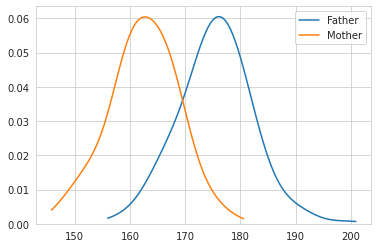

In [75]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(peres['Father'], bw=0.5)
sns.kdeplot(meres['Mother'], bw=0.5)
plt.show()

#### En reprenant le resultat des indicateurs precedemment calculés, expliquez  :
- Sommets des "clochees" (la postion (l'abscisse))
- L'"écartement" des cloches 

#### La dataviz nous permet également d'estimer un "taux de dispersion" 

La boite à moustache / box plot, permet de representer la distribution de la serie en enlevant les observations 
extremes (les plus faibles ou plus elevees), en moyene 1% des données.

Ci dessous cette representation en reprenant nos deux séries

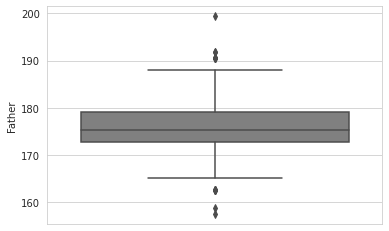

In [29]:
sns.set_style('whitegrid')
sns.boxplot( y = df['Father'],color=".5")
plt.show()

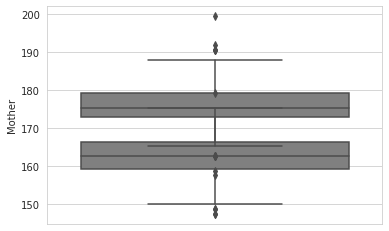

In [31]:
sns.set_style('whitegrid')
sns.boxplot( y = peres['Father'],color=".5")
sns.boxplot( y = meres['Mother'],color=".5")
plt.show()

- La mediane est representée au centre de la box
- Le quartile inferieure est "inferieur" à 173 cm
- Le quartile superieur est "superieur" à 179 cm
- Dans cette boite il y a 50% des observations, elle "mesure" environ 6 cm
- Deux traits parralleles limitent cette figure (189 cm et 165 cm)

==> ils marquent les limites des observations utilisées pour le calcul des metrics (mediane et quartile sont calculés sur cet echantillon de points). Au delà il s'agit d'éléments considérés comme "outliers"
(On utilise 1.5*6=9 cm de limite haute et basse en partant des extremas de la box)

Tracer la meme representation mais pour la taille des meres

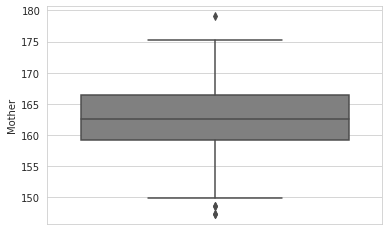

In [32]:
sns.boxplot( y = meres['Mother'],color=".5")
plt.show()

Avec l'aide de la methode .hist() associé aux objets de type Series, tracez la distribution en coupant l'axe des abscisses en 10 intervalles de meme "longueur"

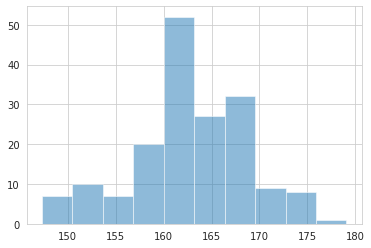

In [46]:
meres['Mother'].hist(bins=10,alpha=0.5)

Utilisez le parametre "bins" de la methode .hist() pour tracez la distribution en coupant l'axe des abscisses en 4 intervalles de meme "longueur"

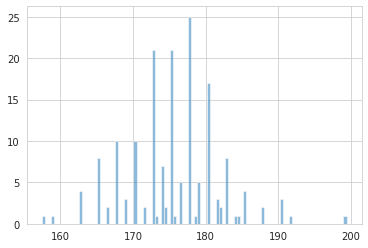

In [40]:
peres['Father'].hist(bins=100,alpha=0.5)

#### Remarque: densité de la série

La densité visualisée plus haut (*Afficher sur un même graphe un estimateur de la densité de la population des pères et de celles des mère"*) correspond à un tracé (continu) interpolé des données (discretes). 

Utilisez la visualisation seaborn .distplot() pour observer ces deux tracés.

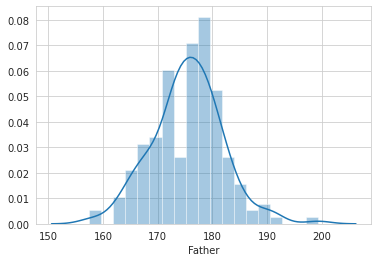

In [47]:
sns.distplot(peres['Father'])

#### Maintenant nous allons tracer une droite (créer un estimateur) interpolant la taille des enfants en fonction des variables explicatives (taille du pere et de la mere)

Pour comprendre sur ce jeu de données les correlations (dépendances ?) entre les colonnes (features), nous allons creer une matrice de correlation.

La corelation entre deux vecteurs/series permet d'identifier une dependance entre eux. Cette valeur, généralement [0,1] vaut 1 pour une dependace et 0 pour une independance. Cependant, les resultats sont le plus souvent des nombres decimaux situés dans cette intervalle.


#### Pearson correlation coefficient

Forme générale : 
<img src="img/f76ccfa7c2ed7f5b085115086107bbe25d329cec.svg" width="200">

Forme discrete :
<img src="img/2b9c2079a3ffc1aacd36201ea0a3fb2460dc226f.svg" width="250">



Elle nous donne une information sur le rapprochement de deux features (les vecteurs que nous avons analysés)

Tracez une representation similaire.

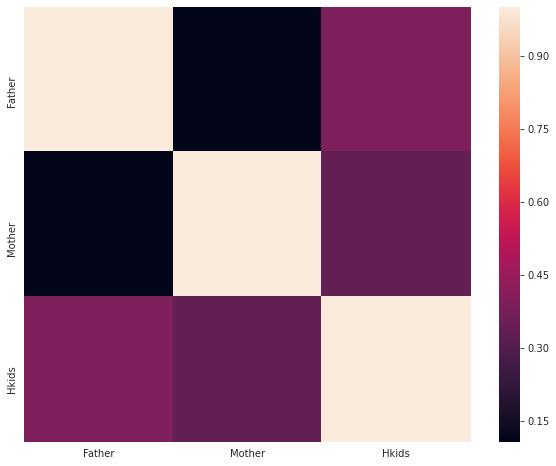

In [76]:
plt.subplots(figsize=(10, 8))
corr = df[['Father','Mother','Hkids']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Utilisez la methode pandas .corr() pour afficher la valeur des coefficients de correlation entre ces colonnes

In [77]:
df[['Father','Mother','Hkids']].corr()

,Father,Mother,Hkids
Father,1e+00,1e-01,4e-01
Mother,1e-01,1e+00,3e-01
Hkids,4e-01,3e-01,1e+00


Quelles informations (relations entre features) pourriez vous tirer de cette representation ?

Verifier cela en traçant l'évolution de la taille des enfants en fonction de la mere, puis du pere

nb: Tracer la droite d'equation y=x sur cette representation de pount pour evaluer le potentiel de cette regression :)

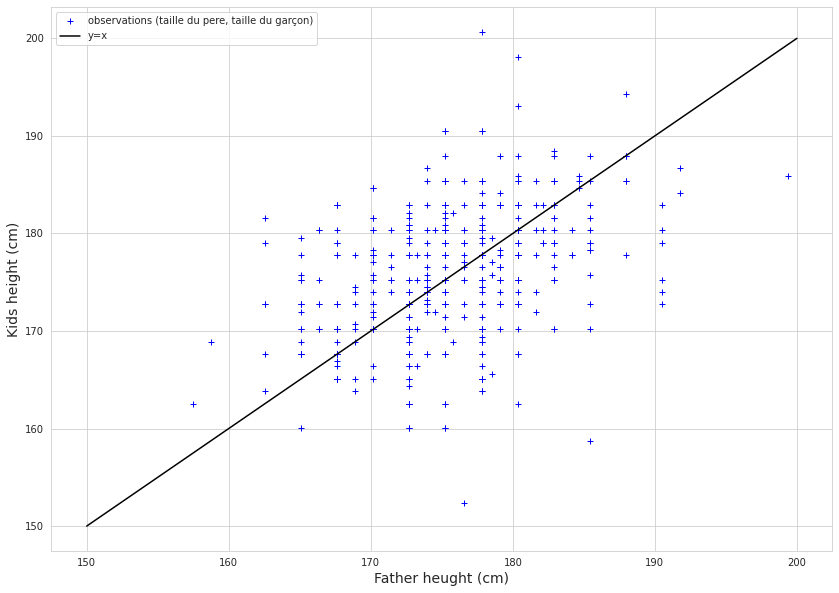

In [78]:
fig = plt.figure(figsize=(14,10))
plt.plot(df['Father'],df['Hkids'],'+',c='blue',label='observations (taille du pere, taille du garçon)')

plt.plot([150,200],[150,200],c='black',label='y=x')
plt.xlabel('Father heught (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

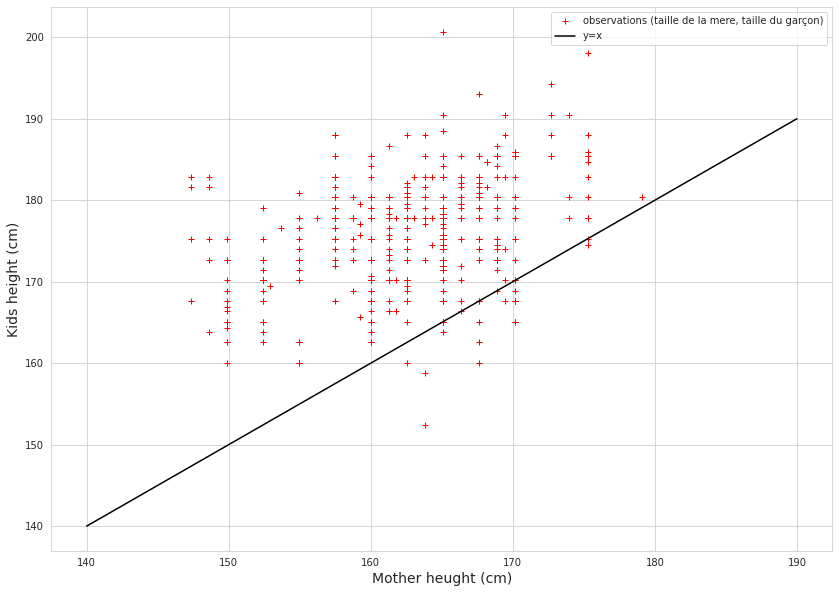

In [79]:
fig = plt.figure(figsize=(14,10))
plt.plot(df['Mother'],df['Hkids'],'+',c='red',label='observations (taille de la mere, taille du garçon)')

plt.plot([140,190],[140,190],c='black',label='y=x')
plt.xlabel('Mother heught (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

Il y a, comment dire, un sacré "biais" entre l'évolution f(taille de la mere)=taille du garçon et la droite y=x

En ajoutant une droite d'equation y=x sur les precedents schéma, nous remarquons que nous pourrions construire une droite y=ax+b.

a : Le coefficient directeur deviendrait un coef de corrélation de la taille d'un des parents sur celle de leurs enfants

b: l'ordonnée à l'origine deviendrait un biais que nous modifierons pour recentrer les valeurs ainsi prédites


L'objectif étant de trouver les coefficients de notre fonction capables de minimiser les ecarts entre la prediction (la droite) et l'observation (les points)


Le modèle linéaire peut être estimé par la méthode des moindres carrés. Très populaire elle est très souvent présentée avec le modèle linéaire.

<img src="img/Estimateur_des_moindres_carres.png" width="800">

Effectuer une régression linéaire au sens des moindres carrés, c'est trouver la droite qui minimise l'écart
y-ŷ (cf schema), c'est-à-dire la somme des carrés des différences : on parle de droite des moindres carrés.

<img src="img/reglin1.png" width="200">

Mais pour l'instant, restons sur un exercice intuitif de creation de model.

Ci dessous notre premier estimateur (y=ax+b) de la taille du garçon en fonction de la taille du pere

In [81]:
def pred_p(coef,hp,b):
    return (coef*hp)+b

# coeff de corelation 
coef=0.3
taille_pere=180
biais=140
pred_p(coef,taille_pere,biais)

194.0

D'apres les donnes nous pouvons trouver une mediane ou moyenne d'une catégorie d'enfant dont le pere mesure 180 cm.

In [22]:
df.groupby(["Father"])['Hkids'].median()

Father
157    163
159    169
163    173
165    172
166    173
168    170
169    171
170    175
171    176
173    170
173    173
174    174
174    176
175    178
176    176
177    178
178    178
179    176
179    177
180    178
182    179
182    180
183    180
184    178
185    185
185    179
188    187
190    177
192    185
199    186
Name: Hkids, dtype: float64

Ajustons le biais pour tendre vers cette valeur

In [23]:
# coeff de corelation 
coef=0.3
taille_pere=180
biais=124

pred_p(coef,180,biais)

178.0

In [24]:
x=df.groupby(["Father"])['Hkids'].median().index
est_p=[]
for elem in x:
    est_p.append(pred_p(coef,elem,biais))
    


Conservons les resultats de l'estimateur et representaons les resultats estimateurs et données reeles

In [25]:
est_p=[pred_p(coef,elem,biais) for elem in df.groupby(["Father"])['Hkids'].median().index]

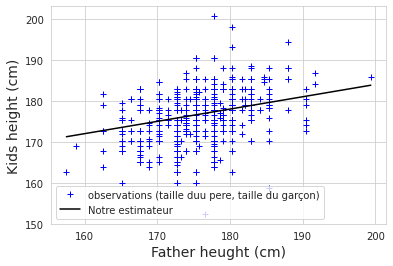

In [26]:
fig = plt.figure()
plt.plot(df['Father'],df['Hkids'],'+',c='blue',label='observations (taille duu pere, taille du garçon)')

plt.plot(x,est_p,c='black',label='Notre estimateur')
plt.xlabel('Father heught (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

#### Ameliorer notre predicteur en jouant sur le coefficient directeur et l'ordonnée à l'origine

Et tracer cette nouvelle representation

In [83]:
# coeff de corelation 
coef=0.36
taille_pere=180
biais=113

pred_p(coef,180,biais)

177.8

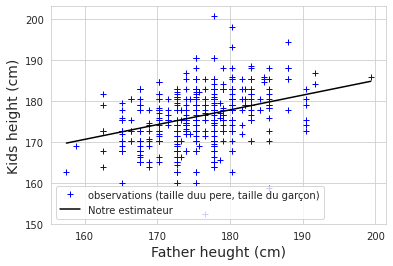

In [84]:
x=df.groupby(["Father"])['Hkids'].median().index
est_p=[]
for elem in x:
    est_p.append(pred_p(coef,elem,biais))
    
est_p=[pred_p(coef,elem,biais) for elem in df.groupby(["Father"])['Hkids'].median().index]

fig = plt.figure()
plt.plot(df['Father'],df['Hkids'],'+',c='blue',label='observations (taille duu pere, taille du garçon)')

plt.plot(x,est_p,c='black',label='Notre estimateur')
plt.xlabel('Father heught (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

Pour évaluer l'ecart entre notre estimateur et les données, nous allons construire un outil qui permet de le quantifier.

Le RMSE (Root Mean Squared Error) <=> La racine de la moyenne des erreurs au carré ...

In [29]:
import math

math.sqrt(((df.groupby(["Father"])['Hkids'].mean().values-pd.Series(est_p))**2).mean())

2.674147025164081

#### Nous aurions pu trouver directement les meilleurs coefficients pour notre estimateur

Reprenons la methode des moindres carrés :

Effectuer une régression linéaire au sens des moindres carrés, c'est trouver la droite qui minimise l'écart
y-ŷ (cf schema), c'est-à-dire la somme des carrés des différences : on parle de droite des moindres carrés.

<img src="img/reglin1.png" width="300">

Il s'agit donc de minimiser J 


<img src="img/reglin3.png" width="300">

Pouvez vous me trouver les meilleurs coefficients a et b, en continuant cet exercice de minimisation ? 

<img src="img/reglin4.png" width="300">

Vous concluerez en calculant le RMSE sur ce nouvel estimateur.

#### Refaite le meme exercice pour trouver un estimateur de la taille d'un garçon connaissant la taille de sa mère.

Vous concluerez en calculant le RMSE sur ce nouvel estimateur

#### La généralisation de ces calculs dans un espace à plusieurs dimensions (plusieurs variables, ...) , nous pousse à utiliser des concepts abstraits mais plus universels

Programme de la suite du cours :


    1- Algèbre bilinéaire – Produit scalaire 
   

    2- Algèbre bilinéaire – Espaces euclidiens 
  

    3- Algèbre bilinéaire – Endomorphismes symétriques d’un espace euclidien, matrices symétrique 
   

    4- Projection orthogonale 


    5- Réduction des endomorphismes et des matrices symétriques 
   

    6- Matrices utiles pour l’analyse de données (définition, propriétés, théorèmes) 
    
